In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
import pickle

import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [2]:
def entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

In [3]:
location = 'Cape_Hatteras'
member = 50 # memeber
std = 0.2 # Standard deviation od initial dispersion

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [4]:
subgroups = {}

max_gap = 15
timesteps = np.linspace(1, 745, 745, dtype=int)
max_releases = timesteps[0::max_gap].shape[0]

set = np.linspace(0, 100, 100, dtype=int)

for i in range(1,max_gap):
    set_start = timesteps[0::i][:max_releases]*100
    indexes = []
    
    for j in set_start:
        indexes = indexes + list(j+set)
    
    subgroups[i] = np.array(indexes)

In [5]:
# Load the hexbin_grid for the domain

# load the hexbin grid 

with open('../data/hexgrid_no_coast.pkl', 'rb') as f:
    hexbin_grid = pickle.load(f)
    
hexbin_grid = hexfunc.hexGrid(hexbin_grid, h3_res=3)

In [6]:
obs_length = len(pset.obs)
n_hex = hexbin_grid.n_hex
probability_sets = {}
entropy_sets = {}


for delta_t in tqdm(range(1, 15)):
    sub_pset = pset.isel(trajectory=subgroups[delta_t])
    probability_subset = np.zeros((n_hex, obs_length))
    entropy_subset = np.zeros(obs_length)

    lons, lats = sub_pset['lon'][:, :].values, sub_pset['lat'][:, :].values

    for t in range(obs_length):
        probability_subset[:, t] = hexbin_grid.count_2d(lons[:,t], lats[:,t], normalize=True)
        entropy_subset[t] = entropy(probability_subset[:, t])
    
    probability_sets[delta_t] = probability_subset
    entropy_sets[delta_t] = entropy_subset

100%|██████████| 14/14 [08:19<00:00, 35.67s/it]


In [ ]:
for delta_t in range(1, 15):
    plt.plot(entropy_sets[delta_t], label=f'{delta_t} days')
    
plt.legend()

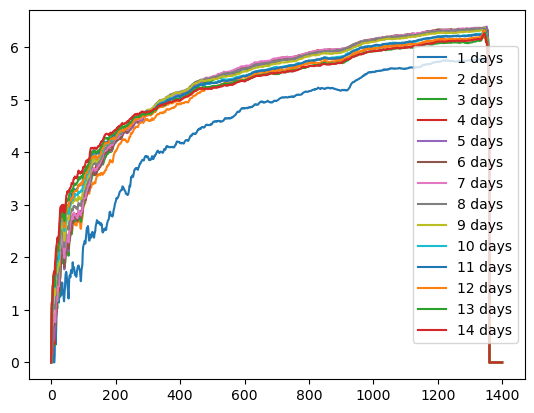

In [11]:
for delta_t in range(1, 15):
    plt.plot(entropy_sets[delta_t], label=f'{delta_t} days')
    
plt.legend()


A channel will always have an input and an output. A channel defines a set of conditional distributons. If you condition on an input the channel defines what the probability of the output is going to be. 

A channel is a set of conditional distributions.

Noisy channels is they're always going to have an input and an output and a channel defines a set of conditional distributions if you conditioned on an input the channel defines what the probability of the output is going to be.

The capacity of a channel $Q$ is defined and the input probability distribution $P_X$ that maximazes the mutual information $I(X|Y)$.